<a href="https://colab.research.google.com/github/saurabhsingh1411/Deep_Learning_Projects/blob/main/CNN/Classifying_MNIST_with_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#x_train,y_train=mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


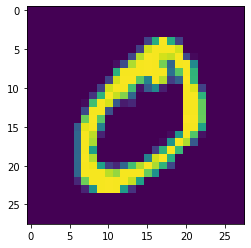

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [11]:
def preprocess_img(img):
  img=img.reshape(-1,28,28,1)
  img=img / 255.0
  return img

In [12]:
x_train=preprocess_img(x_train)
x_test=preprocess_img(x_test)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [14]:
from tensorflow.keras import layers
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=64,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 1,394,122
Trainable params: 1,394,122
Non-trainable params: 0
____________________________________________

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
# from keras.utils import to_categorical
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)

In [16]:
y_test.shape

(10000,)

In [18]:
model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 37s 40ms/step - loss: 0.2683 - accuracy: 0.9206 - val_loss: 0.2297 - val_accuracy: 0.9315
Epoch 2/10
938/938 [==============================] - 37s 39ms/step - loss: 0.2205 - accuracy: 0.9334 - val_loss: 0.1891 - val_accuracy: 0.9415
Epoch 3/10
938/938 [==============================] - 37s 40ms/step - loss: 0.1851 - accuracy: 0.9440 - val_loss: 0.1602 - val_accuracy: 0.9500
Epoch 4/10
938/938 [==============================] - 37s 40ms/step - loss: 0.1572 - accuracy: 0.9520 - val_loss: 0.1445 - val_accuracy: 0.9561
Epoch 5/10
938/938 [==============================] - 38s 40ms/step - loss: 0.1357 - accuracy: 0.9597 - val_loss: 0.1253 - val_accuracy: 0.9612
Epoch 6/10
938/938 [==============================] - 38s 40ms/step - loss: 0.1191 - accuracy: 0.9641 - val_loss: 0.1138 - val_accuracy: 0.9640
Epoch 7/10
938/938 [==============================] - 37s 40ms/step - loss: 0.1074 - accuracy: 0.9677 - val_loss: 0.1012 - val_accuracy:

In [19]:
# import tensorflow as tf
# class CustomCallbacks(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#       if(logs.get('accuracy')>0.998):
#         print("\n 99% acc reached")
#         self.model.stop_training = True


# def preprocess_images(image_set):
#   image_set = image_set.reshape(-1, 28, 28, 1)
#   image_set = image_set / 255.0
#   return image_set


# mnist = tf.keras.datasets.mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# training_images = preprocess_images(training_images)
# test_images = preprocess_images(test_images)

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(
#     training_images,
#     training_labels,
#     batch_size=64,
#     epochs=20,
#     callbacks=[CustomCallbacks()]
# )